## Problem 1 - Less data to train

### Data Augmentation

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [4]:
data.head()

,emergency_or_not,images
0,1,images/Emergency/emergency_1072.jpg
1,1,images/Emergency/emergency_1208.jpg
2,1,images/Emergency/emergency_1625.jpg
3,1,images/Emergency/emergency_1437.jpg
4,1,images/Emergency/emergency_1454.jpg


In [5]:
data.shape

(2352, 2)

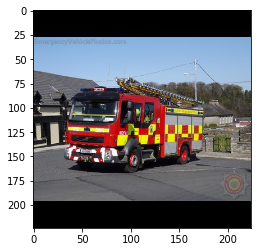

In [6]:
idx = 646

img_name = data.images.iloc[idx]
target = data.emergency_or_not.iloc[idx]

img = imread('../datasets/emergency_classification/' + img_name)

pylab.imshow(img)
pylab.show()

In [7]:
from keras.preprocessing import image

Using TensorFlow backend.


In [8]:
datagen = image.ImageDataGenerator(
    width_shift_range = 0.2,
    horizontal_flip = True
)

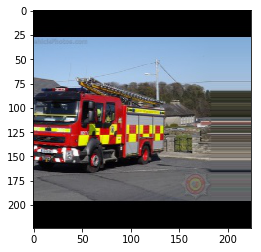

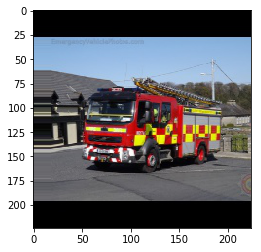

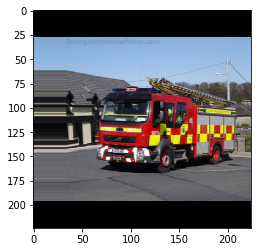

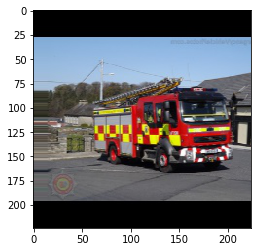

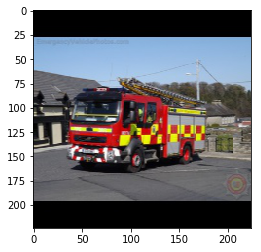

In [9]:
cnt = 0
for X, y in datagen.flow(np.expand_dims(img, axis=0), (target, ), batch_size=5):
    if cnt == 5:
        break
    
    cnt += 1
    plt.imshow(X.reshape(224, 224, 3).astype(int))
    plt.show()

## Problem 2 - Lots of Variation in Data

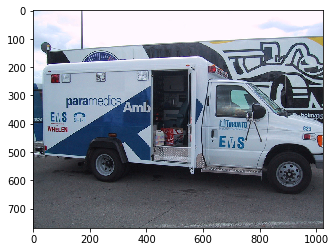

In [10]:
img = imread('images/emergency_100.jpg')

pylab.imshow(img)
pylab.show()

In [11]:
img.shape

(768, 1024, 3)

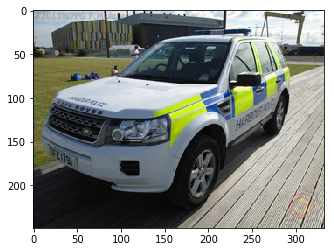

In [12]:
img = imread('images/emergency_1000.jpg')

pylab.imshow(img)
pylab.show()

In [13]:
img.shape

(249, 333, 3)

In [14]:
from keras.preprocessing import image

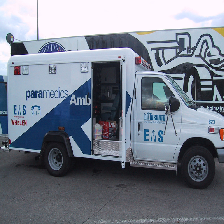

In [15]:
image.load_img('images/emergency_100.jpg', target_size=(224, 224))

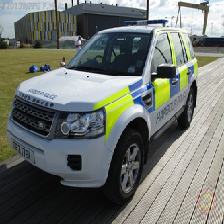

In [16]:
image.load_img('images/emergency_1000.jpg', target_size=(224, 224))

In [17]:
# transformation?

## Problem 3 - Overfitting

### Dropout

In [18]:
%pylab inline

import pandas as pd

from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [19]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [20]:
images = []
for img_loc in data.images:
    img = image.load_img('../datasets/emergency_classification/' + img_loc, target_size=(100, 100))
    img = image.img_to_array(img)
    images.append(img)
    
images=np.array(images)

In [21]:
train_x = images.reshape(2352, 100*100*3)

In [22]:
train_x /= train_x.max()
train_y = data.emergency_or_not.values

In [23]:
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

In [24]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [25]:
history = model.fit(X_train, Y_train, epochs=1000, batch_size=512,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/1000
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6903 - acc: 0.5328 - val_loss: 0.6479 - val_acc: 0.6544
Epoch 2/1000
1646/1646 [==============================] - 0s 117us/step - loss: 0.6331 - acc: 0.6731 - val_loss: 0.6210 - val_acc: 0.6870
Epoch 3/1000
1646/1646 [==============================] - 0s 136us/step - loss: 0.6036 - acc: 0.7078 - val_loss: 0.6072 - val_acc: 0.6856
Epoch 4/1000
1646/1646 [==============================] - 0s 153us/step - loss: 0.5860 - acc: 0.7242 - val_loss: 0.5959 - val_acc: 0.6898
Epoch 5/1000
1646/1646 [==============================] - 0s 158us/step - loss: 0.5726 - acc: 0.7230 - val_loss: 0.5900 - val_acc: 0.7011
Epoch 6/1000
1646/1646 [==============================] - 0s 133us/step - loss: 0.5651 - acc: 0.7309 - val_loss: 0.5901 - val_acc: 0.6898
Epoch 7/1000
1646/1646 [==============================] - 0s 137us/step - loss: 0.5606 - acc: 0.7290 - val_loss: 0.5862 - val_a

1646/1646 [==============================] - 0s 139us/step - loss: 0.4982 - acc: 0.7685 - val_loss: 0.5705 - val_acc: 0.7011
Epoch 60/1000
1646/1646 [==============================] - 0s 140us/step - loss: 0.5006 - acc: 0.7697 - val_loss: 0.5593 - val_acc: 0.7125
Epoch 61/1000
1646/1646 [==============================] - 0s 142us/step - loss: 0.4983 - acc: 0.7679 - val_loss: 0.5619 - val_acc: 0.7153
Epoch 62/1000
1646/1646 [==============================] - 0s 144us/step - loss: 0.4979 - acc: 0.7764 - val_loss: 0.5588 - val_acc: 0.7139
Epoch 63/1000
1646/1646 [==============================] - 0s 140us/step - loss: 0.4949 - acc: 0.7746 - val_loss: 0.5632 - val_acc: 0.7139
Epoch 64/1000
1646/1646 [==============================] - 0s 135us/step - loss: 0.4964 - acc: 0.7770 - val_loss: 0.5588 - val_acc: 0.7125
Epoch 65/1000
1646/1646 [==============================] - 0s 126us/step - loss: 0.4939 - acc: 0.7716 - val_loss: 0.5581 - val_acc: 0.7153
Epoch 66/1000
1646/1646 [================

Epoch 118/1000
1646/1646 [==============================] - 0s 119us/step - loss: 0.4642 - acc: 0.7977 - val_loss: 0.5526 - val_acc: 0.7195
Epoch 119/1000
1646/1646 [==============================] - 0s 134us/step - loss: 0.4646 - acc: 0.7934 - val_loss: 0.5528 - val_acc: 0.7238
Epoch 120/1000
1646/1646 [==============================] - 0s 131us/step - loss: 0.4633 - acc: 0.7947 - val_loss: 0.5534 - val_acc: 0.7252
Epoch 121/1000
1646/1646 [==============================] - 0s 136us/step - loss: 0.4636 - acc: 0.7934 - val_loss: 0.5577 - val_acc: 0.7139
Epoch 122/1000
1646/1646 [==============================] - 0s 128us/step - loss: 0.4641 - acc: 0.7947 - val_loss: 0.5545 - val_acc: 0.7266
Epoch 123/1000
1646/1646 [==============================] - 0s 130us/step - loss: 0.4633 - acc: 0.7989 - val_loss: 0.5576 - val_acc: 0.7365
Epoch 124/1000
1646/1646 [==============================] - 0s 138us/step - loss: 0.4623 - acc: 0.7965 - val_loss: 0.5565 - val_acc: 0.7167
Epoch 125/1000
1646/

1646/1646 [==============================] - 0s 124us/step - loss: 0.4392 - acc: 0.8123 - val_loss: 0.5559 - val_acc: 0.7323
Epoch 177/1000
1646/1646 [==============================] - 0s 105us/step - loss: 0.4414 - acc: 0.8074 - val_loss: 0.5494 - val_acc: 0.7394
Epoch 178/1000
1646/1646 [==============================] - 0s 121us/step - loss: 0.4381 - acc: 0.8092 - val_loss: 0.5503 - val_acc: 0.7323
Epoch 179/1000
1646/1646 [==============================] - 0s 123us/step - loss: 0.4372 - acc: 0.8111 - val_loss: 0.5493 - val_acc: 0.7295
Epoch 180/1000
1646/1646 [==============================] - 0s 119us/step - loss: 0.4375 - acc: 0.8141 - val_loss: 0.5545 - val_acc: 0.7351
Epoch 181/1000
1646/1646 [==============================] - 0s 130us/step - loss: 0.4387 - acc: 0.8153 - val_loss: 0.5496 - val_acc: 0.7280
Epoch 182/1000
1646/1646 [==============================] - 0s 125us/step - loss: 0.4358 - acc: 0.8092 - val_loss: 0.5494 - val_acc: 0.7266
Epoch 183/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 113us/step - loss: 0.4151 - acc: 0.8232 - val_loss: 0.5481 - val_acc: 0.7394
Epoch 235/1000
1646/1646 [==============================] - 0s 113us/step - loss: 0.4137 - acc: 0.8232 - val_loss: 0.5485 - val_acc: 0.7380
Epoch 236/1000
1646/1646 [==============================] - 0s 114us/step - loss: 0.4140 - acc: 0.8275 - val_loss: 0.5486 - val_acc: 0.7394
Epoch 237/1000
1646/1646 [==============================] - 0s 113us/step - loss: 0.4160 - acc: 0.8208 - val_loss: 0.5522 - val_acc: 0.7337
Epoch 238/1000
1646/1646 [==============================] - 0s 113us/step - loss: 0.4125 - acc: 0.8256 - val_loss: 0.5501 - val_acc: 0.7365
Epoch 239/1000
1646/1646 [==============================] - 0s 108us/step - loss: 0.4115 - acc: 0.8256 - val_loss: 0.5616 - val_acc: 0.7252
Epoch 240/1000
1646/1646 [==============================] - 0s 111us/step - loss: 0.4137 - acc: 0.8323 - val_loss: 0.5498 - val_acc: 0.7380
Epoch 241/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 111us/step - loss: 0.3945 - acc: 0.8384 - val_loss: 0.5467 - val_acc: 0.7465
Epoch 293/1000
1646/1646 [==============================] - 0s 114us/step - loss: 0.3922 - acc: 0.8360 - val_loss: 0.5472 - val_acc: 0.7450
Epoch 294/1000
1646/1646 [==============================] - 0s 111us/step - loss: 0.3893 - acc: 0.8414 - val_loss: 0.5537 - val_acc: 0.7295
Epoch 295/1000
1646/1646 [==============================] - 0s 111us/step - loss: 0.3944 - acc: 0.8378 - val_loss: 0.5778 - val_acc: 0.7153
Epoch 296/1000
1646/1646 [==============================] - 0s 113us/step - loss: 0.4036 - acc: 0.8262 - val_loss: 0.5495 - val_acc: 0.7351
Epoch 297/1000
1646/1646 [==============================] - 0s 113us/step - loss: 0.3877 - acc: 0.8390 - val_loss: 0.5467 - val_acc: 0.7479
Epoch 298/1000
1646/1646 [==============================] - 0s 112us/step - loss: 0.3878 - acc: 0.8408 - val_loss: 0.5477 - val_acc: 0.7422
Epoch 299/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 114us/step - loss: 0.3765 - acc: 0.8457 - val_loss: 0.5679 - val_acc: 0.7280
Epoch 351/1000
1646/1646 [==============================] - 0s 118us/step - loss: 0.3712 - acc: 0.8439 - val_loss: 0.5731 - val_acc: 0.7252
Epoch 352/1000
1646/1646 [==============================] - 0s 104us/step - loss: 0.3822 - acc: 0.8348 - val_loss: 0.5475 - val_acc: 0.7479
Epoch 353/1000
1646/1646 [==============================] - 0s 113us/step - loss: 0.3648 - acc: 0.8566 - val_loss: 0.5475 - val_acc: 0.7521
Epoch 354/1000
1646/1646 [==============================] - 0s 110us/step - loss: 0.3637 - acc: 0.8572 - val_loss: 0.5518 - val_acc: 0.7380
Epoch 355/1000
1646/1646 [==============================] - 0s 114us/step - loss: 0.3652 - acc: 0.8530 - val_loss: 0.5648 - val_acc: 0.7252
Epoch 356/1000
1646/1646 [==============================] - 0s 111us/step - loss: 0.3687 - acc: 0.8524 - val_loss: 0.5471 - val_acc: 0.7507
Epoch 357/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 112us/step - loss: 0.3417 - acc: 0.8736 - val_loss: 0.5506 - val_acc: 0.7422
Epoch 409/1000
1646/1646 [==============================] - 0s 111us/step - loss: 0.3435 - acc: 0.8730 - val_loss: 0.5679 - val_acc: 0.7238
Epoch 410/1000
1646/1646 [==============================] - 0s 111us/step - loss: 0.3456 - acc: 0.8663 - val_loss: 0.5636 - val_acc: 0.7295
Epoch 411/1000
1646/1646 [==============================] - 0s 113us/step - loss: 0.3432 - acc: 0.8688 - val_loss: 0.5674 - val_acc: 0.7210
Epoch 412/1000
1646/1646 [==============================] - 0s 114us/step - loss: 0.3518 - acc: 0.8633 - val_loss: 0.5521 - val_acc: 0.7408
Epoch 413/1000
1646/1646 [==============================] - 0s 116us/step - loss: 0.3437 - acc: 0.8645 - val_loss: 0.5481 - val_acc: 0.7422
Epoch 414/1000
1646/1646 [==============================] - 0s 126us/step - loss: 0.3438 - acc: 0.8621 - val_loss: 0.5490 - val_acc: 0.7422
Epoch 415/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 109us/step - loss: 0.3198 - acc: 0.8858 - val_loss: 0.5520 - val_acc: 0.7394
Epoch 467/1000
1646/1646 [==============================] - 0s 112us/step - loss: 0.3219 - acc: 0.8858 - val_loss: 0.5493 - val_acc: 0.7479
Epoch 468/1000
1646/1646 [==============================] - 0s 118us/step - loss: 0.3174 - acc: 0.8888 - val_loss: 0.5503 - val_acc: 0.7493
Epoch 469/1000
1646/1646 [==============================] - 0s 121us/step - loss: 0.3181 - acc: 0.8900 - val_loss: 0.5533 - val_acc: 0.7365
Epoch 470/1000
1646/1646 [==============================] - 0s 110us/step - loss: 0.3249 - acc: 0.8791 - val_loss: 0.6190 - val_acc: 0.7068
Epoch 471/1000
1646/1646 [==============================] - 0s 112us/step - loss: 0.3485 - acc: 0.8560 - val_loss: 0.5566 - val_acc: 0.7394
Epoch 472/1000
1646/1646 [==============================] - 0s 111us/step - loss: 0.3189 - acc: 0.8846 - val_loss: 0.5554 - val_acc: 0.7309
Epoch 473/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 106us/step - loss: 0.3046 - acc: 0.8894 - val_loss: 0.5635 - val_acc: 0.7337
Epoch 525/1000
1646/1646 [==============================] - 0s 110us/step - loss: 0.3102 - acc: 0.8773 - val_loss: 0.5528 - val_acc: 0.7535
Epoch 526/1000
1646/1646 [==============================] - 0s 112us/step - loss: 0.2950 - acc: 0.8979 - val_loss: 0.5622 - val_acc: 0.7365
Epoch 527/1000
1646/1646 [==============================] - 0s 110us/step - loss: 0.2958 - acc: 0.8998 - val_loss: 0.5561 - val_acc: 0.7479
Epoch 528/1000
1646/1646 [==============================] - 0s 123us/step - loss: 0.2953 - acc: 0.8985 - val_loss: 0.5788 - val_acc: 0.7280
Epoch 529/1000
1646/1646 [==============================] - 0s 144us/step - loss: 0.3061 - acc: 0.8827 - val_loss: 0.5677 - val_acc: 0.7323
Epoch 530/1000
1646/1646 [==============================] - 0s 126us/step - loss: 0.3045 - acc: 0.8919 - val_loss: 0.5515 - val_acc: 0.7521
Epoch 531/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 113us/step - loss: 0.2739 - acc: 0.9186 - val_loss: 0.5851 - val_acc: 0.7309
Epoch 583/1000
1646/1646 [==============================] - 0s 112us/step - loss: 0.2792 - acc: 0.9004 - val_loss: 0.5628 - val_acc: 0.7465
Epoch 584/1000
1646/1646 [==============================] - 0s 110us/step - loss: 0.2757 - acc: 0.9077 - val_loss: 0.5589 - val_acc: 0.7422
Epoch 585/1000
1646/1646 [==============================] - 0s 110us/step - loss: 0.2747 - acc: 0.9168 - val_loss: 0.5550 - val_acc: 0.7507
Epoch 586/1000
1646/1646 [==============================] - 0s 109us/step - loss: 0.2776 - acc: 0.9040 - val_loss: 0.5586 - val_acc: 0.7493
Epoch 587/1000
1646/1646 [==============================] - 0s 110us/step - loss: 0.2893 - acc: 0.8943 - val_loss: 0.5610 - val_acc: 0.7479
Epoch 588/1000
1646/1646 [==============================] - 0s 112us/step - loss: 0.2759 - acc: 0.9034 - val_loss: 0.5761 - val_acc: 0.7351
Epoch 589/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 111us/step - loss: 0.2548 - acc: 0.9228 - val_loss: 0.5689 - val_acc: 0.7422
Epoch 641/1000
1646/1646 [==============================] - 0s 105us/step - loss: 0.2654 - acc: 0.9113 - val_loss: 0.5641 - val_acc: 0.7493
Epoch 642/1000
1646/1646 [==============================] - 0s 105us/step - loss: 0.2606 - acc: 0.9143 - val_loss: 0.5644 - val_acc: 0.7507
Epoch 643/1000
1646/1646 [==============================] - 0s 110us/step - loss: 0.2600 - acc: 0.9186 - val_loss: 0.5664 - val_acc: 0.7493
Epoch 644/1000
1646/1646 [==============================] - 0s 110us/step - loss: 0.2566 - acc: 0.9168 - val_loss: 0.5599 - val_acc: 0.7479
Epoch 645/1000
1646/1646 [==============================] - 0s 109us/step - loss: 0.2521 - acc: 0.9228 - val_loss: 0.5631 - val_acc: 0.7493
Epoch 646/1000
1646/1646 [==============================] - 0s 111us/step - loss: 0.2511 - acc: 0.9277 - val_loss: 0.5981 - val_acc: 0.7323
Epoch 647/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 127us/step - loss: 0.2384 - acc: 0.9289 - val_loss: 0.5678 - val_acc: 0.7493
Epoch 699/1000
1646/1646 [==============================] - 0s 112us/step - loss: 0.2327 - acc: 0.9380 - val_loss: 0.5680 - val_acc: 0.7450
Epoch 700/1000
1646/1646 [==============================] - 0s 111us/step - loss: 0.2357 - acc: 0.9320 - val_loss: 0.5652 - val_acc: 0.7521
Epoch 701/1000
1646/1646 [==============================] - 0s 112us/step - loss: 0.2320 - acc: 0.9362 - val_loss: 0.5643 - val_acc: 0.7493
Epoch 702/1000
1646/1646 [==============================] - 0s 120us/step - loss: 0.2338 - acc: 0.9362 - val_loss: 0.6046 - val_acc: 0.7082
Epoch 703/1000
1646/1646 [==============================] - 0s 121us/step - loss: 0.2931 - acc: 0.8767 - val_loss: 0.5822 - val_acc: 0.7365
Epoch 704/1000
1646/1646 [==============================] - 0s 113us/step - loss: 0.2364 - acc: 0.9332 - val_loss: 0.5656 - val_acc: 0.7493
Epoch 705/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 122us/step - loss: 0.2170 - acc: 0.9392 - val_loss: 0.5715 - val_acc: 0.7507
Epoch 757/1000
1646/1646 [==============================] - 0s 133us/step - loss: 0.2192 - acc: 0.9435 - val_loss: 0.5806 - val_acc: 0.7380
Epoch 758/1000
1646/1646 [==============================] - 0s 150us/step - loss: 0.2375 - acc: 0.9265 - val_loss: 0.6873 - val_acc: 0.6771
Epoch 759/1000
1646/1646 [==============================] - 0s 135us/step - loss: 0.3294 - acc: 0.8457 - val_loss: 0.6523 - val_acc: 0.6898
Epoch 760/1000
1646/1646 [==============================] - 0s 129us/step - loss: 0.2610 - acc: 0.9016 - val_loss: 0.6105 - val_acc: 0.7210
Epoch 761/1000
1646/1646 [==============================] - 0s 126us/step - loss: 0.2350 - acc: 0.9180 - val_loss: 0.5837 - val_acc: 0.7507
Epoch 762/1000
1646/1646 [==============================] - 0s 134us/step - loss: 0.2170 - acc: 0.9368 - val_loss: 0.5838 - val_acc: 0.7436
Epoch 763/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 133us/step - loss: 0.2004 - acc: 0.9550 - val_loss: 0.5778 - val_acc: 0.7493
Epoch 815/1000
1646/1646 [==============================] - 0s 128us/step - loss: 0.1989 - acc: 0.9520 - val_loss: 0.5801 - val_acc: 0.7507
Epoch 816/1000
1646/1646 [==============================] - 0s 131us/step - loss: 0.1987 - acc: 0.9520 - val_loss: 0.5782 - val_acc: 0.7507
Epoch 817/1000
1646/1646 [==============================] - 0s 140us/step - loss: 0.1969 - acc: 0.9538 - val_loss: 0.5782 - val_acc: 0.7493
Epoch 818/1000
1646/1646 [==============================] - 0s 131us/step - loss: 0.1971 - acc: 0.9526 - val_loss: 0.5989 - val_acc: 0.7450
Epoch 819/1000
1646/1646 [==============================] - 0s 133us/step - loss: 0.2257 - acc: 0.9259 - val_loss: 0.6036 - val_acc: 0.7450
Epoch 820/1000
1646/1646 [==============================] - 0s 138us/step - loss: 0.2025 - acc: 0.9447 - val_loss: 0.5859 - val_acc: 0.7479
Epoch 821/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 109us/step - loss: 0.1978 - acc: 0.9447 - val_loss: 0.6047 - val_acc: 0.7266
Epoch 873/1000
1646/1646 [==============================] - 0s 109us/step - loss: 0.1934 - acc: 0.9532 - val_loss: 0.5856 - val_acc: 0.7507
Epoch 874/1000
1646/1646 [==============================] - 0s 112us/step - loss: 0.1857 - acc: 0.9484 - val_loss: 0.6040 - val_acc: 0.7436
Epoch 875/1000
1646/1646 [==============================] - 0s 112us/step - loss: 0.1927 - acc: 0.9471 - val_loss: 0.6161 - val_acc: 0.7422
Epoch 876/1000
1646/1646 [==============================] - 0s 115us/step - loss: 0.1989 - acc: 0.9392 - val_loss: 0.6006 - val_acc: 0.7479
Epoch 877/1000
1646/1646 [==============================] - 0s 108us/step - loss: 0.1943 - acc: 0.9459 - val_loss: 0.5897 - val_acc: 0.7535
Epoch 878/1000
1646/1646 [==============================] - 0s 117us/step - loss: 0.1905 - acc: 0.9514 - val_loss: 0.5973 - val_acc: 0.7535
Epoch 879/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 124us/step - loss: 0.1675 - acc: 0.9672 - val_loss: 0.5931 - val_acc: 0.7535
Epoch 931/1000
1646/1646 [==============================] - 0s 114us/step - loss: 0.1715 - acc: 0.9635 - val_loss: 0.6152 - val_acc: 0.7365
Epoch 932/1000
1646/1646 [==============================] - 0s 110us/step - loss: 0.1782 - acc: 0.9605 - val_loss: 0.6316 - val_acc: 0.7351
Epoch 933/1000
1646/1646 [==============================] - 0s 113us/step - loss: 0.2132 - acc: 0.9186 - val_loss: 0.6435 - val_acc: 0.7351
Epoch 934/1000
1646/1646 [==============================] - 0s 111us/step - loss: 0.2126 - acc: 0.9228 - val_loss: 0.6258 - val_acc: 0.7394
Epoch 935/1000
1646/1646 [==============================] - 0s 113us/step - loss: 0.2042 - acc: 0.9295 - val_loss: 0.6963 - val_acc: 0.7210
Epoch 936/1000
1646/1646 [==============================] - 0s 112us/step - loss: 0.2403 - acc: 0.8973 - val_loss: 0.7232 - val_acc: 0.7125
Epoch 937/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 135us/step - loss: 0.1544 - acc: 0.9684 - val_loss: 0.6139 - val_acc: 0.7578
Epoch 989/1000
1646/1646 [==============================] - 0s 124us/step - loss: 0.1568 - acc: 0.9672 - val_loss: 0.6181 - val_acc: 0.7351
Epoch 990/1000
1646/1646 [==============================] - 0s 128us/step - loss: 0.1719 - acc: 0.9550 - val_loss: 0.6359 - val_acc: 0.7210
Epoch 991/1000
1646/1646 [==============================] - 0s 128us/step - loss: 0.1832 - acc: 0.9459 - val_loss: 0.6501 - val_acc: 0.7153
Epoch 992/1000
1646/1646 [==============================] - 0s 119us/step - loss: 0.1692 - acc: 0.9581 - val_loss: 0.6304 - val_acc: 0.7238
Epoch 993/1000
1646/1646 [==============================] - 0s 113us/step - loss: 0.1587 - acc: 0.9648 - val_loss: 0.6033 - val_acc: 0.7479
Epoch 994/1000
1646/1646 [==============================] - 0s 115us/step - loss: 0.1593 - acc: 0.9678 - val_loss: 0.6038 - val_acc: 0.7493
Epoch 995/1000
1646/1646 [=========

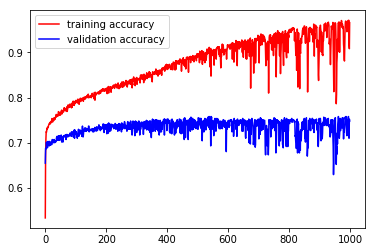

In [26]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

In [27]:
from keras.layers import Dropout

In [28]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [29]:
history = model.fit(X_train, Y_train, epochs=1000, batch_size=512,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/1000
1646/1646 [==============================] - 1s 366us/step - loss: 0.7007 - acc: 0.5443 - val_loss: 0.6499 - val_acc: 0.6133
Epoch 2/1000
1646/1646 [==============================] - 0s 219us/step - loss: 0.6462 - acc: 0.6306 - val_loss: 0.6203 - val_acc: 0.6870
Epoch 3/1000
1646/1646 [==============================] - 0s 274us/step - loss: 0.6258 - acc: 0.6476 - val_loss: 0.6123 - val_acc: 0.6601
Epoch 4/1000
1646/1646 [==============================] - 0s 260us/step - loss: 0.6076 - acc: 0.6780 - val_loss: 0.6048 - val_acc: 0.6742
Epoch 5/1000
1646/1646 [==============================] - 0s 248us/step - loss: 0.5910 - acc: 0.6938 - val_loss: 0.5955 - val_acc: 0.6813
Epoch 6/1000
1646/1646 [==============================] - 0s 271us/step - loss: 0.5862 - acc: 0.7151 - val_loss: 0.5902 - val_acc: 0.6898
Epoch 7/1000
1646/1646 [==============================] - 0s 240us/step - loss: 0.5841 - acc: 0.7193 - val_loss: 0.5905 - val

1646/1646 [==============================] - 0s 248us/step - loss: 0.5126 - acc: 0.7600 - val_loss: 0.5616 - val_acc: 0.7125
Epoch 60/1000
1646/1646 [==============================] - 0s 242us/step - loss: 0.5263 - acc: 0.7564 - val_loss: 0.5613 - val_acc: 0.7125
Epoch 61/1000
1646/1646 [==============================] - 0s 253us/step - loss: 0.5149 - acc: 0.7612 - val_loss: 0.5646 - val_acc: 0.7153
Epoch 62/1000
1646/1646 [==============================] - 0s 246us/step - loss: 0.5189 - acc: 0.7631 - val_loss: 0.5643 - val_acc: 0.7153
Epoch 63/1000
1646/1646 [==============================] - 0s 256us/step - loss: 0.5179 - acc: 0.7612 - val_loss: 0.5609 - val_acc: 0.7125
Epoch 64/1000
1646/1646 [==============================] - 0s 245us/step - loss: 0.5159 - acc: 0.7679 - val_loss: 0.5606 - val_acc: 0.7110
Epoch 65/1000
1646/1646 [==============================] - 0s 257us/step - loss: 0.5130 - acc: 0.7649 - val_loss: 0.5614 - val_acc: 0.7125
Epoch 66/1000
1646/1646 [================

Epoch 118/1000
1646/1646 [==============================] - 0s 205us/step - loss: 0.4941 - acc: 0.7740 - val_loss: 0.5542 - val_acc: 0.7181
Epoch 119/1000
1646/1646 [==============================] - 0s 247us/step - loss: 0.4878 - acc: 0.7770 - val_loss: 0.5532 - val_acc: 0.7195
Epoch 120/1000
1646/1646 [==============================] - 0s 245us/step - loss: 0.4887 - acc: 0.7783 - val_loss: 0.5531 - val_acc: 0.7252
Epoch 121/1000
1646/1646 [==============================] - 0s 246us/step - loss: 0.4854 - acc: 0.7734 - val_loss: 0.5538 - val_acc: 0.7195
Epoch 122/1000
1646/1646 [==============================] - 0s 238us/step - loss: 0.4816 - acc: 0.7764 - val_loss: 0.5528 - val_acc: 0.7167
Epoch 123/1000
1646/1646 [==============================] - 0s 207us/step - loss: 0.4882 - acc: 0.7661 - val_loss: 0.5561 - val_acc: 0.7195
Epoch 124/1000
1646/1646 [==============================] - 0s 209us/step - loss: 0.4897 - acc: 0.7740 - val_loss: 0.5531 - val_acc: 0.7224
Epoch 125/1000
1646/

1646/1646 [==============================] - 0s 250us/step - loss: 0.4644 - acc: 0.7892 - val_loss: 0.5504 - val_acc: 0.7153
Epoch 177/1000
1646/1646 [==============================] - 0s 236us/step - loss: 0.4744 - acc: 0.7801 - val_loss: 0.5502 - val_acc: 0.7266
Epoch 178/1000
1646/1646 [==============================] - 0s 229us/step - loss: 0.4693 - acc: 0.7910 - val_loss: 0.5495 - val_acc: 0.7153
Epoch 179/1000
1646/1646 [==============================] - 0s 208us/step - loss: 0.4662 - acc: 0.7928 - val_loss: 0.5506 - val_acc: 0.7295
Epoch 180/1000
1646/1646 [==============================] - 0s 210us/step - loss: 0.4725 - acc: 0.7861 - val_loss: 0.5499 - val_acc: 0.7210
Epoch 181/1000
1646/1646 [==============================] - 0s 207us/step - loss: 0.4662 - acc: 0.7855 - val_loss: 0.5581 - val_acc: 0.7309
Epoch 182/1000
1646/1646 [==============================] - 0s 204us/step - loss: 0.4785 - acc: 0.7855 - val_loss: 0.5514 - val_acc: 0.7295
Epoch 183/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 214us/step - loss: 0.4536 - acc: 0.7940 - val_loss: 0.5477 - val_acc: 0.7337
Epoch 235/1000
1646/1646 [==============================] - 0s 208us/step - loss: 0.4432 - acc: 0.8038 - val_loss: 0.5473 - val_acc: 0.7224
Epoch 236/1000
1646/1646 [==============================] - 0s 211us/step - loss: 0.4475 - acc: 0.8019 - val_loss: 0.5483 - val_acc: 0.7238
Epoch 237/1000
1646/1646 [==============================] - 0s 210us/step - loss: 0.4452 - acc: 0.7940 - val_loss: 0.5488 - val_acc: 0.7337
Epoch 238/1000
1646/1646 [==============================] - 0s 206us/step - loss: 0.4483 - acc: 0.8062 - val_loss: 0.5479 - val_acc: 0.7309
Epoch 239/1000
1646/1646 [==============================] - 0s 208us/step - loss: 0.4505 - acc: 0.8026 - val_loss: 0.5478 - val_acc: 0.7238
Epoch 240/1000
1646/1646 [==============================] - 0s 210us/step - loss: 0.4461 - acc: 0.7995 - val_loss: 0.5473 - val_acc: 0.7365
Epoch 241/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 216us/step - loss: 0.4268 - acc: 0.8220 - val_loss: 0.5461 - val_acc: 0.7351
Epoch 293/1000
1646/1646 [==============================] - 0s 210us/step - loss: 0.4270 - acc: 0.8214 - val_loss: 0.5450 - val_acc: 0.7394
Epoch 294/1000
1646/1646 [==============================] - 0s 208us/step - loss: 0.4292 - acc: 0.8056 - val_loss: 0.5490 - val_acc: 0.7365
Epoch 295/1000
1646/1646 [==============================] - 0s 236us/step - loss: 0.4205 - acc: 0.8171 - val_loss: 0.5490 - val_acc: 0.7323
Epoch 296/1000
1646/1646 [==============================] - 0s 244us/step - loss: 0.4234 - acc: 0.8208 - val_loss: 0.5525 - val_acc: 0.7280
Epoch 297/1000
1646/1646 [==============================] - 0s 217us/step - loss: 0.4300 - acc: 0.8092 - val_loss: 0.5490 - val_acc: 0.7351
Epoch 298/1000
1646/1646 [==============================] - 0s 211us/step - loss: 0.4268 - acc: 0.8104 - val_loss: 0.5459 - val_acc: 0.7394
Epoch 299/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 208us/step - loss: 0.4109 - acc: 0.8159 - val_loss: 0.5480 - val_acc: 0.7408
Epoch 351/1000
1646/1646 [==============================] - 0s 252us/step - loss: 0.4135 - acc: 0.8165 - val_loss: 0.5491 - val_acc: 0.7337
Epoch 352/1000
1646/1646 [==============================] - 0s 246us/step - loss: 0.4091 - acc: 0.8220 - val_loss: 0.5475 - val_acc: 0.7422
Epoch 353/1000
1646/1646 [==============================] - 0s 213us/step - loss: 0.4169 - acc: 0.8147 - val_loss: 0.5487 - val_acc: 0.7394
Epoch 354/1000
1646/1646 [==============================] - 0s 254us/step - loss: 0.4112 - acc: 0.8238 - val_loss: 0.5479 - val_acc: 0.7380
Epoch 355/1000
1646/1646 [==============================] - 0s 251us/step - loss: 0.4094 - acc: 0.8190 - val_loss: 0.5440 - val_acc: 0.7465
Epoch 356/1000
1646/1646 [==============================] - 0s 243us/step - loss: 0.4152 - acc: 0.8244 - val_loss: 0.5441 - val_acc: 0.7450
Epoch 357/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 205us/step - loss: 0.3991 - acc: 0.8238 - val_loss: 0.5412 - val_acc: 0.7493
Epoch 409/1000
1646/1646 [==============================] - 0s 208us/step - loss: 0.3891 - acc: 0.8305 - val_loss: 0.5418 - val_acc: 0.7493
Epoch 410/1000
1646/1646 [==============================] - 0s 204us/step - loss: 0.3945 - acc: 0.8354 - val_loss: 0.5410 - val_acc: 0.7493
Epoch 411/1000
1646/1646 [==============================] - 0s 204us/step - loss: 0.3936 - acc: 0.8305 - val_loss: 0.5444 - val_acc: 0.7422
Epoch 412/1000
1646/1646 [==============================] - 0s 208us/step - loss: 0.3998 - acc: 0.8293 - val_loss: 0.5531 - val_acc: 0.7280
Epoch 413/1000
1646/1646 [==============================] - 0s 208us/step - loss: 0.4032 - acc: 0.8183 - val_loss: 0.5436 - val_acc: 0.7465
Epoch 414/1000
1646/1646 [==============================] - 0s 204us/step - loss: 0.3938 - acc: 0.8165 - val_loss: 0.5434 - val_acc: 0.7465
Epoch 415/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 205us/step - loss: 0.3758 - acc: 0.8426 - val_loss: 0.5441 - val_acc: 0.7493
Epoch 467/1000
1646/1646 [==============================] - 0s 215us/step - loss: 0.3729 - acc: 0.8390 - val_loss: 0.5461 - val_acc: 0.7493
Epoch 468/1000
1646/1646 [==============================] - 0s 243us/step - loss: 0.3719 - acc: 0.8487 - val_loss: 0.5492 - val_acc: 0.7408
Epoch 469/1000
1646/1646 [==============================] - 0s 259us/step - loss: 0.3820 - acc: 0.8281 - val_loss: 0.5455 - val_acc: 0.7493
Epoch 470/1000
1646/1646 [==============================] - 0s 240us/step - loss: 0.3869 - acc: 0.8311 - val_loss: 0.5451 - val_acc: 0.7493
Epoch 471/1000
1646/1646 [==============================] - 0s 231us/step - loss: 0.3710 - acc: 0.8487 - val_loss: 0.5438 - val_acc: 0.7507
Epoch 472/1000
1646/1646 [==============================] - 0s 224us/step - loss: 0.3757 - acc: 0.8396 - val_loss: 0.5470 - val_acc: 0.7380
Epoch 473/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 206us/step - loss: 0.3621 - acc: 0.8499 - val_loss: 0.5478 - val_acc: 0.7450
Epoch 525/1000
1646/1646 [==============================] - 0s 206us/step - loss: 0.3602 - acc: 0.8426 - val_loss: 0.5465 - val_acc: 0.7479
Epoch 526/1000
1646/1646 [==============================] - 0s 209us/step - loss: 0.3588 - acc: 0.8426 - val_loss: 0.5463 - val_acc: 0.7507
Epoch 527/1000
1646/1646 [==============================] - 0s 203us/step - loss: 0.3615 - acc: 0.8426 - val_loss: 0.5456 - val_acc: 0.7507
Epoch 528/1000
1646/1646 [==============================] - 0s 216us/step - loss: 0.3565 - acc: 0.8566 - val_loss: 0.5451 - val_acc: 0.7493
Epoch 529/1000
1646/1646 [==============================] - 0s 203us/step - loss: 0.3547 - acc: 0.8530 - val_loss: 0.5462 - val_acc: 0.7507
Epoch 530/1000
1646/1646 [==============================] - 0s 207us/step - loss: 0.3556 - acc: 0.8505 - val_loss: 0.5566 - val_acc: 0.7337
Epoch 531/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 208us/step - loss: 0.3424 - acc: 0.8572 - val_loss: 0.5462 - val_acc: 0.7578
Epoch 583/1000
1646/1646 [==============================] - 0s 208us/step - loss: 0.3332 - acc: 0.8584 - val_loss: 0.5479 - val_acc: 0.7507
Epoch 584/1000
1646/1646 [==============================] - 0s 207us/step - loss: 0.3412 - acc: 0.8548 - val_loss: 0.5432 - val_acc: 0.7550
Epoch 585/1000
1646/1646 [==============================] - 0s 209us/step - loss: 0.3323 - acc: 0.8627 - val_loss: 0.5666 - val_acc: 0.7337
Epoch 586/1000
1646/1646 [==============================] - 0s 239us/step - loss: 0.3468 - acc: 0.8584 - val_loss: 0.5444 - val_acc: 0.7521
Epoch 587/1000
1646/1646 [==============================] - 0s 250us/step - loss: 0.3491 - acc: 0.8469 - val_loss: 0.5451 - val_acc: 0.7578
Epoch 588/1000
1646/1646 [==============================] - 0s 241us/step - loss: 0.3411 - acc: 0.8615 - val_loss: 0.5456 - val_acc: 0.7521
Epoch 589/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 203us/step - loss: 0.3365 - acc: 0.8609 - val_loss: 0.5475 - val_acc: 0.7521
Epoch 641/1000
1646/1646 [==============================] - 0s 207us/step - loss: 0.3181 - acc: 0.8730 - val_loss: 0.5476 - val_acc: 0.7535
Epoch 642/1000
1646/1646 [==============================] - 0s 207us/step - loss: 0.3245 - acc: 0.8682 - val_loss: 0.5478 - val_acc: 0.7507
Epoch 643/1000
1646/1646 [==============================] - 0s 247us/step - loss: 0.3327 - acc: 0.8663 - val_loss: 0.5508 - val_acc: 0.7479
Epoch 644/1000
1646/1646 [==============================] - 0s 228us/step - loss: 0.3175 - acc: 0.8718 - val_loss: 0.5531 - val_acc: 0.7479
Epoch 645/1000
1646/1646 [==============================] - 0s 205us/step - loss: 0.3245 - acc: 0.8682 - val_loss: 0.5725 - val_acc: 0.7224
Epoch 646/1000
1646/1646 [==============================] - 0s 207us/step - loss: 0.3334 - acc: 0.8572 - val_loss: 0.5448 - val_acc: 0.7564
Epoch 647/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 208us/step - loss: 0.3153 - acc: 0.8639 - val_loss: 0.5479 - val_acc: 0.7465
Epoch 699/1000
1646/1646 [==============================] - 0s 204us/step - loss: 0.3195 - acc: 0.8797 - val_loss: 0.5459 - val_acc: 0.7564
Epoch 700/1000
1646/1646 [==============================] - 0s 206us/step - loss: 0.3036 - acc: 0.8797 - val_loss: 0.5616 - val_acc: 0.7351
Epoch 701/1000
1646/1646 [==============================] - 0s 207us/step - loss: 0.3174 - acc: 0.8682 - val_loss: 0.5462 - val_acc: 0.7550
Epoch 702/1000
1646/1646 [==============================] - 0s 206us/step - loss: 0.3026 - acc: 0.8767 - val_loss: 0.5471 - val_acc: 0.7535
Epoch 703/1000
1646/1646 [==============================] - 0s 206us/step - loss: 0.2978 - acc: 0.8955 - val_loss: 0.5490 - val_acc: 0.7564
Epoch 704/1000
1646/1646 [==============================] - 0s 217us/step - loss: 0.3055 - acc: 0.8809 - val_loss: 0.5462 - val_acc: 0.7564
Epoch 705/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 208us/step - loss: 0.2886 - acc: 0.8840 - val_loss: 0.5557 - val_acc: 0.7479
Epoch 757/1000
1646/1646 [==============================] - 0s 203us/step - loss: 0.2966 - acc: 0.8852 - val_loss: 0.5484 - val_acc: 0.7493
Epoch 758/1000
1646/1646 [==============================] - 0s 205us/step - loss: 0.2930 - acc: 0.8852 - val_loss: 0.5604 - val_acc: 0.7394
Epoch 759/1000
1646/1646 [==============================] - 0s 212us/step - loss: 0.2919 - acc: 0.8876 - val_loss: 0.5516 - val_acc: 0.7535
Epoch 760/1000
1646/1646 [==============================] - 0s 209us/step - loss: 0.2919 - acc: 0.8913 - val_loss: 0.5483 - val_acc: 0.7521
Epoch 761/1000
1646/1646 [==============================] - 0s 210us/step - loss: 0.2882 - acc: 0.8876 - val_loss: 0.5518 - val_acc: 0.7521
Epoch 762/1000
1646/1646 [==============================] - 0s 213us/step - loss: 0.2995 - acc: 0.8949 - val_loss: 0.5592 - val_acc: 0.7408
Epoch 763/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 223us/step - loss: 0.2723 - acc: 0.8973 - val_loss: 0.5513 - val_acc: 0.7521
Epoch 815/1000
1646/1646 [==============================] - 0s 227us/step - loss: 0.2723 - acc: 0.9052 - val_loss: 0.5541 - val_acc: 0.7564
Epoch 816/1000
1646/1646 [==============================] - 0s 211us/step - loss: 0.2764 - acc: 0.8991 - val_loss: 0.5547 - val_acc: 0.7550
Epoch 817/1000
1646/1646 [==============================] - 0s 207us/step - loss: 0.2800 - acc: 0.8943 - val_loss: 0.5533 - val_acc: 0.7535
Epoch 818/1000
1646/1646 [==============================] - 0s 212us/step - loss: 0.2712 - acc: 0.8998 - val_loss: 0.5527 - val_acc: 0.7535
Epoch 819/1000
1646/1646 [==============================] - 0s 203us/step - loss: 0.2730 - acc: 0.8925 - val_loss: 0.5631 - val_acc: 0.7493
Epoch 820/1000
1646/1646 [==============================] - 0s 205us/step - loss: 0.2712 - acc: 0.8943 - val_loss: 0.5556 - val_acc: 0.7535
Epoch 821/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 206us/step - loss: 0.2676 - acc: 0.8937 - val_loss: 0.5646 - val_acc: 0.7493
Epoch 873/1000
1646/1646 [==============================] - 0s 203us/step - loss: 0.2660 - acc: 0.9046 - val_loss: 0.5685 - val_acc: 0.7507
Epoch 874/1000
1646/1646 [==============================] - 0s 205us/step - loss: 0.2653 - acc: 0.8985 - val_loss: 0.5578 - val_acc: 0.7550
Epoch 875/1000
1646/1646 [==============================] - 0s 201us/step - loss: 0.2561 - acc: 0.9131 - val_loss: 0.5571 - val_acc: 0.7535
Epoch 876/1000
1646/1646 [==============================] - 0s 228us/step - loss: 0.2584 - acc: 0.9070 - val_loss: 0.5596 - val_acc: 0.7479
Epoch 877/1000
1646/1646 [==============================] - 0s 240us/step - loss: 0.2571 - acc: 0.9052 - val_loss: 0.5691 - val_acc: 0.7479
Epoch 878/1000
1646/1646 [==============================] - 0s 263us/step - loss: 0.2551 - acc: 0.9156 - val_loss: 0.5633 - val_acc: 0.7507
Epoch 879/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 207us/step - loss: 0.2395 - acc: 0.9095 - val_loss: 0.5640 - val_acc: 0.7550
Epoch 931/1000
1646/1646 [==============================] - 0s 210us/step - loss: 0.2522 - acc: 0.9162 - val_loss: 0.5596 - val_acc: 0.7564
Epoch 932/1000
1646/1646 [==============================] - 0s 209us/step - loss: 0.2412 - acc: 0.9192 - val_loss: 0.5607 - val_acc: 0.7550
Epoch 933/1000
1646/1646 [==============================] - 0s 218us/step - loss: 0.2400 - acc: 0.9131 - val_loss: 0.5603 - val_acc: 0.7550
Epoch 934/1000
1646/1646 [==============================] - 0s 249us/step - loss: 0.2517 - acc: 0.9089 - val_loss: 0.5634 - val_acc: 0.7550
Epoch 935/1000
1646/1646 [==============================] - 0s 234us/step - loss: 0.2416 - acc: 0.9174 - val_loss: 0.5854 - val_acc: 0.7493
Epoch 936/1000
1646/1646 [==============================] - 0s 205us/step - loss: 0.2565 - acc: 0.9016 - val_loss: 0.5605 - val_acc: 0.7550
Epoch 937/1000
1646/1646 [=========

1646/1646 [==============================] - 0s 210us/step - loss: 0.2360 - acc: 0.9174 - val_loss: 0.5624 - val_acc: 0.7578
Epoch 989/1000
1646/1646 [==============================] - 0s 208us/step - loss: 0.2262 - acc: 0.9235 - val_loss: 0.5785 - val_acc: 0.7507
Epoch 990/1000
1646/1646 [==============================] - 0s 224us/step - loss: 0.2382 - acc: 0.9143 - val_loss: 0.5618 - val_acc: 0.7592
Epoch 991/1000
1646/1646 [==============================] - 0s 233us/step - loss: 0.2325 - acc: 0.9180 - val_loss: 0.5803 - val_acc: 0.7521
Epoch 992/1000
1646/1646 [==============================] - 0s 211us/step - loss: 0.2247 - acc: 0.9283 - val_loss: 0.5674 - val_acc: 0.7493
Epoch 993/1000
1646/1646 [==============================] - 0s 208us/step - loss: 0.2332 - acc: 0.9162 - val_loss: 0.5847 - val_acc: 0.7380
Epoch 994/1000
1646/1646 [==============================] - 0s 204us/step - loss: 0.2422 - acc: 0.9095 - val_loss: 0.5647 - val_acc: 0.7564
Epoch 995/1000
1646/1646 [=========

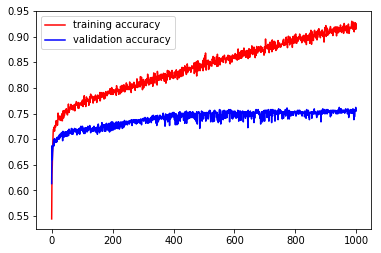

In [30]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

### Early Stopping

In [31]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [32]:
from keras.callbacks import EarlyStopping

In [33]:
estop = EarlyStopping(monitor='val_acc', patience=10)

In [34]:
history = model.fit(X_train, Y_train, epochs=1000, batch_size=512,validation_data=(X_valid,Y_valid), callbacks=[estop])

Train on 1646 samples, validate on 706 samples
Epoch 1/1000
1646/1646 [==============================] - 1s 351us/step - loss: 0.6984 - acc: 0.5067 - val_loss: 0.6567 - val_acc: 0.6756
Epoch 2/1000
1646/1646 [==============================] - 0s 199us/step - loss: 0.6425 - acc: 0.6646 - val_loss: 0.6277 - val_acc: 0.6827
Epoch 3/1000
1646/1646 [==============================] - 0s 194us/step - loss: 0.6088 - acc: 0.7096 - val_loss: 0.6118 - val_acc: 0.6884
Epoch 4/1000
1646/1646 [==============================] - 0s 205us/step - loss: 0.5912 - acc: 0.7205 - val_loss: 0.6013 - val_acc: 0.6912
Epoch 5/1000
1646/1646 [==============================] - 0s 248us/step - loss: 0.5800 - acc: 0.7260 - val_loss: 0.5976 - val_acc: 0.6969
Epoch 6/1000
1646/1646 [==============================] - 0s 240us/step - loss: 0.5726 - acc: 0.7284 - val_loss: 0.5919 - val_acc: 0.7011
Epoch 7/1000
1646/1646 [==============================] - 0s 240us/step - loss: 0.5661 - acc: 0.7309 - val_loss: 0.5877 - val

## Problem 5 - More time to Train

### BatchNormalization

In [36]:
from keras.layers import BatchNormalization

In [37]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [38]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=512,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 1s 434us/step - loss: 1.2350 - acc: 0.6087 - val_loss: 1.0754 - val_acc: 0.6487
Epoch 2/50
1646/1646 [==============================] - 0s 271us/step - loss: 0.5730 - acc: 0.7388 - val_loss: 0.9312 - val_acc: 0.6062
Epoch 3/50
1646/1646 [==============================] - 0s 244us/step - loss: 0.5103 - acc: 0.7546 - val_loss: 0.8754 - val_acc: 0.6190
Epoch 4/50
1646/1646 [==============================] - 0s 215us/step - loss: 0.4827 - acc: 0.7722 - val_loss: 0.6743 - val_acc: 0.6756
Epoch 5/50
1646/1646 [==============================] - 0s 257us/step - loss: 0.4619 - acc: 0.7892 - val_loss: 0.5864 - val_acc: 0.7238
Epoch 6/50
1646/1646 [==============================] - 0s 237us/step - loss: 0.4604 - acc: 0.7825 - val_loss: 0.6408 - val_acc: 0.6827
Epoch 7/50
1646/1646 [==============================] - 0s 230us/step - loss: 0.4429 - acc: 0.7916 - val_loss: 0.5879 - val_acc: 0.7082
E

## Problem 6 - Not an Appropriate Architecture for the problem

In [39]:
from keras.applications import vgg16, resnet50

In [40]:
images = []
for img_loc in data.images:
    img = image.load_img('../datasets/emergency_classification/' + img_loc, target_size=(224, 224))
    img = image.img_to_array(img)
    images.append(img)
    
images=np.array(images)

In [41]:
train_x = vgg16.preprocess_input(images, mode='tf')
train_y = data.emergency_or_not.values

In [42]:
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

In [43]:
base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

In [44]:
for layer in base_model.layers:
    layer.Trainable = False

In [45]:
model = Sequential()
model.add(base_model)
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [46]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [47]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [48]:
model.fit(X_train, Y_train, epochs=3, batch_size=32,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/3
1646/1646 [==============================] - 20s 12ms/step - loss: 0.2949 - acc: 0.8736 - val_loss: 0.2270 - val_acc: 0.9207
Epoch 2/3
1646/1646 [==============================] - 16s 10ms/step - loss: 0.1296 - acc: 0.9520 - val_loss: 1.2642 - val_acc: 0.5892
Epoch 3/3
1646/1646 [==============================] - 16s 10ms/step - loss: 0.0597 - acc: 0.9806 - val_loss: 0.2545 - val_acc: 0.9136
